# LSE CHANGEMAKERS
Andres Oats Garcia and Rohan Prakash

In [1]:
#import modules
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns #for nicer plots
from sklearn.linear_model import LinearRegression #to retrieve regression coefficients

#set up seaborn
sns.set_theme()
sns.set_palette('Dark2') #Dark2, PuOr, RdBu

Different modules have different column names in the dataset and we have some missing columns -- in particular EC210 is missing columns

For comparability, we consider contributions = posts ;
                            days online = days online ;
                            answers = answers

## EC201 LT AND ST

In [2]:
#import dataset
EC201_LT = pd.read_excel('EC201 - LT and ST - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC201_LT.columns = EC201_LT.iloc[0]
EC201_LT = EC201_LT.drop(0)
EC201_LT = EC201_LT.drop('groups', axis =1)
EC201_LT = EC201_LT.fillna(0)


EC201_LT['days online'] = EC201_LT['days online'].astype(int)
EC201_LT['views'] = EC201_LT['views'].astype(int)
EC201_LT['contributions'] = EC201_LT['contributions'].astype(int)
EC201_LT['questions'] = EC201_LT['questions'].astype(int)
EC201_LT['notes'] = EC201_LT['notes'].astype(int)
EC201_LT['answers'] = EC201_LT['answers'].astype(int)
EC201_LT['endorsed answers'] = EC201_LT['endorsed answers'].astype(int)


EC201_LT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,0,0,0,0,0,0,0
2,Instructor,37,594,33,0,0,29,0
3,Instructor,55,633,426,0,19,259,0
4,Instructor,17,42,3,0,0,3,0
5,Instructor,59,110,19,0,3,8,0


In [3]:
EC201_LT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000
mean,20.715582,88.464448,3.440242,0.918306,0.036309,1.580938,0.829047
std,29.265258,147.528469,26.637718,3.289927,0.749877,19.465000,13.032342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.000000,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,166.000000,633.000000,426.000000,39.000000,19.000000,347.000000,273.000000


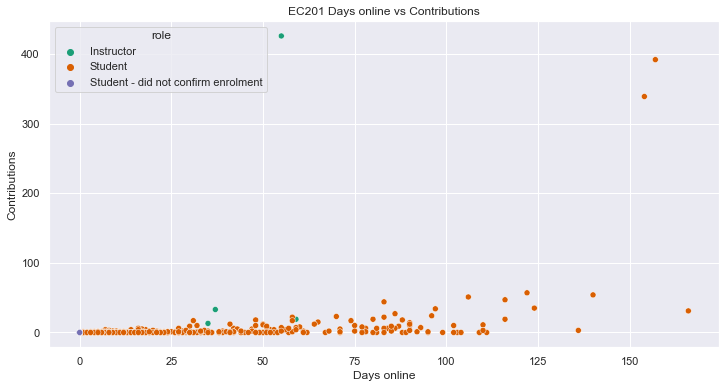

In [4]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC201_LT)

plt.title("EC201 Days online vs Contributions")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


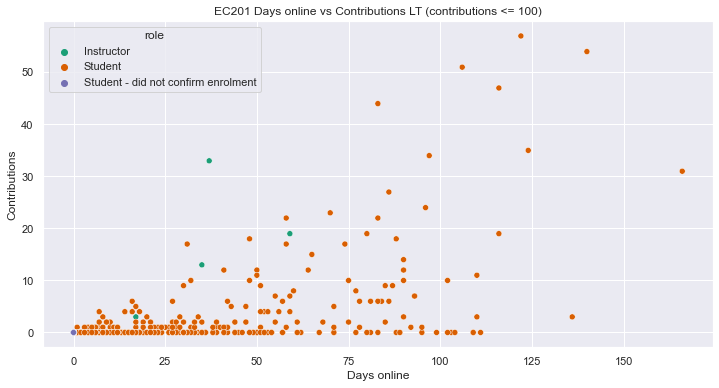

In [5]:
## removing the outliers

plt.figure(figsize=(12, 6))

condition = EC201_LT['contributions'] > 100

df = EC201_LT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC201 Days online vs Contributions LT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


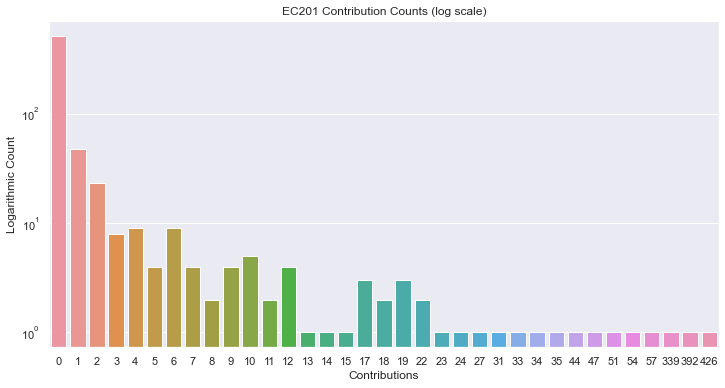

In [6]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC201_LT)

plt.yscale('log')
plt.title("EC201 Contribution Counts (log scale)")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


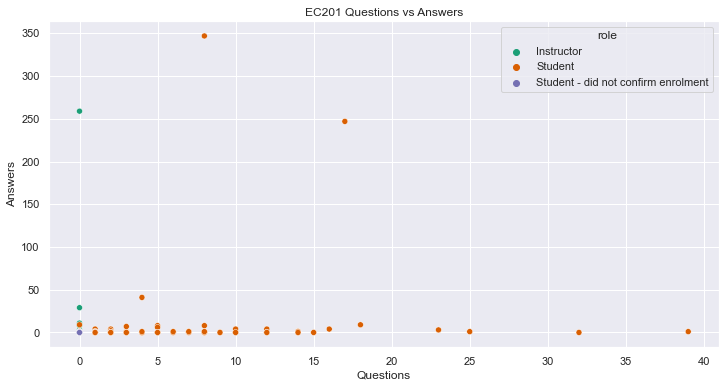

In [7]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC201_LT)

plt.title("EC201 Questions vs Answers")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


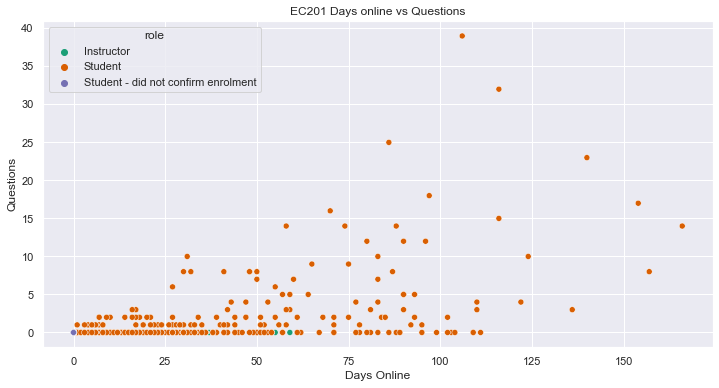

In [8]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC201_LT)

plt.title("EC201 Days online vs Questions")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


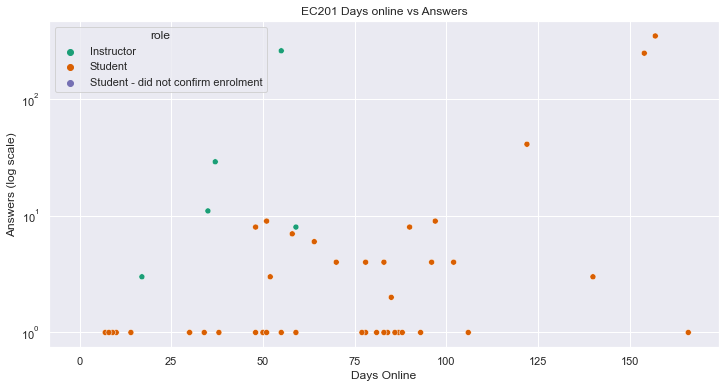

In [9]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC201_LT)

plt.title("EC201 Days online vs Answers")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


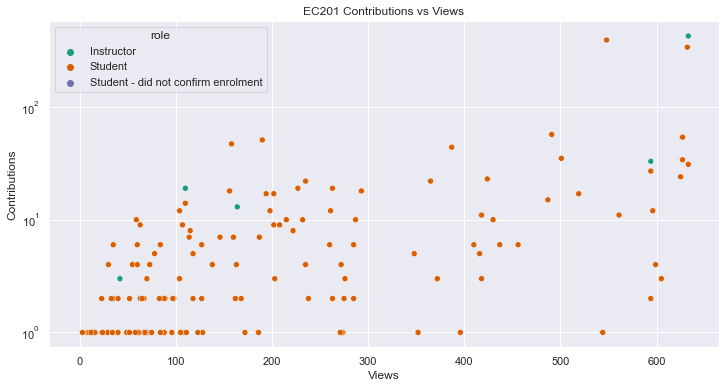

In [10]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='role', data=EC201_LT)

plt.title("EC201 Contributions vs Views")

plt.yscale("log")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


## EC201 MT

In [11]:
#import dataset
EC201_MT = pd.read_excel('EC201 - MT - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC201_MT.columns = EC201_MT.iloc[0]
EC201_MT = EC201_MT.drop(0)
EC201_MT = EC201_MT.drop('groups', axis =1)
EC201_MT = EC201_MT.fillna(0)


EC201_MT['days online'] = EC201_MT['days online'].astype(int)
EC201_MT['views'] = EC201_MT['views'].astype(int)
EC201_MT['contributions'] = EC201_MT['contributions'].astype(int)
EC201_MT['questions'] = EC201_MT['questions'].astype(int)
EC201_MT['notes'] = EC201_MT['notes'].astype(int)
EC201_MT['answers'] = EC201_MT['answers'].astype(int)
EC201_MT['endorsed answers'] = EC201_MT['endorsed answers'].astype(int)



EC201_MT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,2,9,4,0,0,3,0
2,Instructor,87,649,20,0,0,19,0
3,Instructor,75,653,116,0,27,57,0
4,Instructor,24,75,16,0,0,14,0
5,Instructor,140,655,711,2,58,418,0


In [12]:
EC201_MT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,28.132730,90.051282,3.491704,0.871795,0.134238,1.467572,0.377074
std,37.678364,148.826874,31.048196,3.433464,2.484104,19.195176,6.333831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.500000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,242.000000,658.000000,711.000000,42.000000,58.000000,418.000000,158.000000


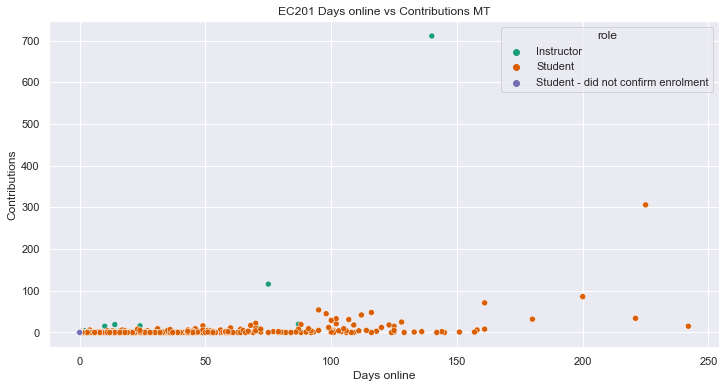

In [13]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC201_MT)

plt.title("EC201 Days online vs Contributions MT")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


Removing the outliers

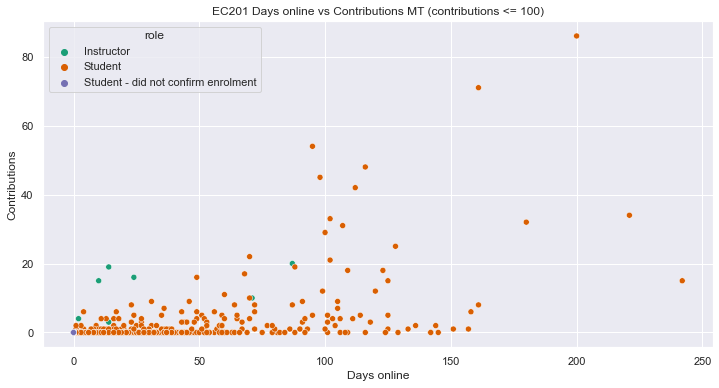

In [14]:
plt.figure(figsize=(12, 6))

condition = EC201_MT['contributions'] > 100

df = EC201_MT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC201 Days online vs Contributions MT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


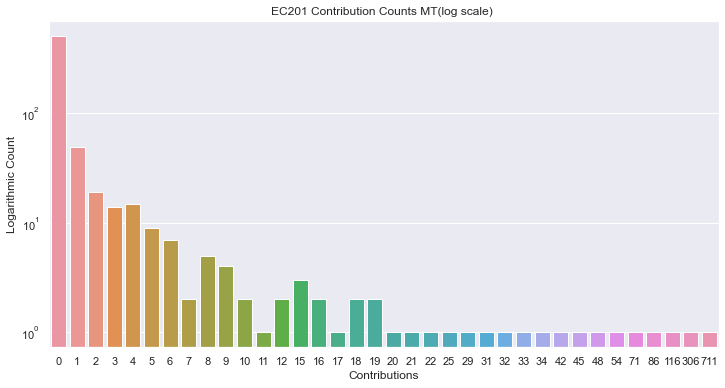

In [15]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC201_MT)

plt.yscale('log')
plt.title("EC201 Contribution Counts MT(log scale) ")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


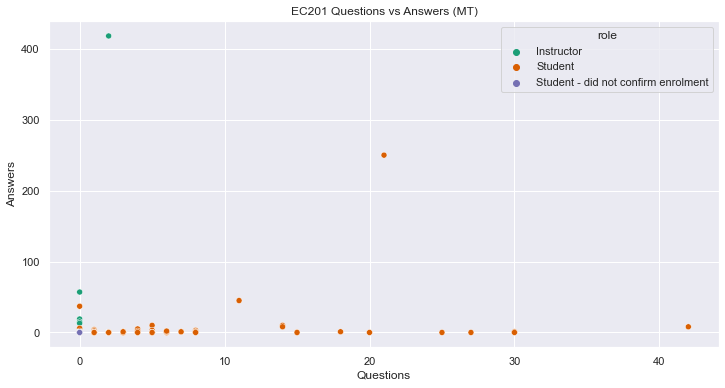

In [16]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC201_MT)

plt.title("EC201 Questions vs Answers (MT)")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


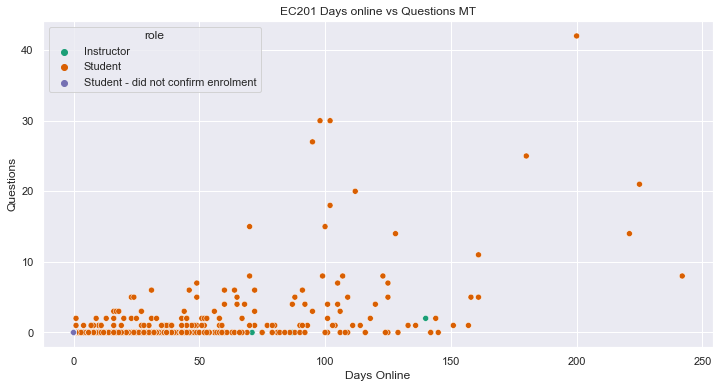

In [17]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC201_MT)

plt.title("EC201 Days online vs Questions MT")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


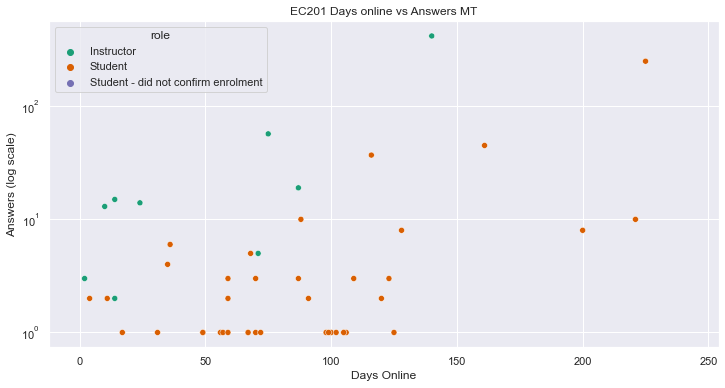

In [18]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC201_MT)

plt.title("EC201 Days online vs Answers MT")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


## Comparing across terms EC201

In [19]:
EC201_LT["Term"] = "LT"
EC201_MT["Term"] = "MT"

EC201_combine = pd.concat([EC201_MT, EC201_LT], ignore_index=True)
EC201_combine.head()

,role,days online,views,contributions,questions,notes,answers,endorsed answers,Term
0,Instructor,2,9,4,0,0,3,0,MT
1,Instructor,87,649,20,0,0,19,0,MT
2,Instructor,75,653,116,0,27,57,0,MT
3,Instructor,24,75,16,0,0,14,0,MT
4,Instructor,140,655,711,2,58,418,0,MT


Relatively similar distributions between the two terms.

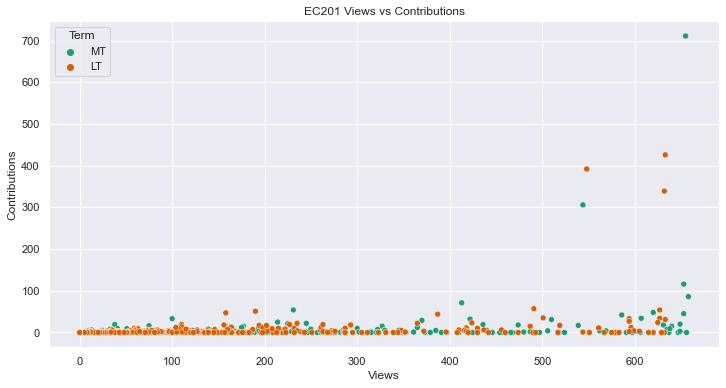

In [20]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='Term', data=EC201_combine)

plt.title("EC201 Views vs Contributions")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


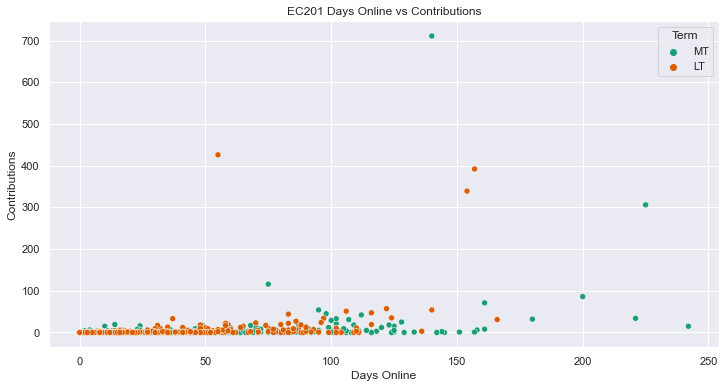

In [21]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='Term', data=EC201_combine)

plt.title("EC201 Days Online vs Contributions")

plt.xlabel("Days Online")
plt.ylabel("Contributions")

plt.show()


## EC210 LT AND ST

In [22]:
#import dataset
EC210_LT = pd.read_excel('EC210 - LT and ST - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC210_LT.columns = EC210_LT.iloc[0]
EC210_LT = EC210_LT.drop(0)
EC210_LT = EC210_LT.drop('groups', axis =1)
EC210_LT = EC210_LT.fillna(0)


EC210_LT.head()


,role,days online,posts,answers,edits to answers,followups,replies to followups
1,instructor,121,1,73,31,0,7
2,instructor,43,0,39,6,0,5
3,instructor,41,0,16,0,1,4
4,instructor,100,0,74,9,2,44
5,instructor,11,0,38,4,0,4


In [23]:
EC210_LT['days online'] = EC210_LT['days online'].astype(int)
EC210_LT['posts'] = EC210_LT['posts'].astype(int)
EC210_LT['answers'] = EC210_LT['answers'].astype(int)
EC210_LT['edits to answers'] = EC210_LT['edits to answers'].astype(int)
EC210_LT['followups'] = EC210_LT['followups'].astype(int)
EC210_LT['replies to followups'] = EC210_LT['replies to followups'].astype(int)

EC210_LT.drop('role', axis=1).describe()

,days online,posts,answers,edits to answers,followups,replies to followups
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,21.093023,1.360465,1.544186,0.458140,0.423256,0.460465
std,24.823399,4.544811,7.738238,2.518346,1.713084,2.614657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.750000,1.000000,0.000000,0.000000,0.000000,0.000000
max,132.000000,51.000000,74.000000,31.000000,17.000000,44.000000


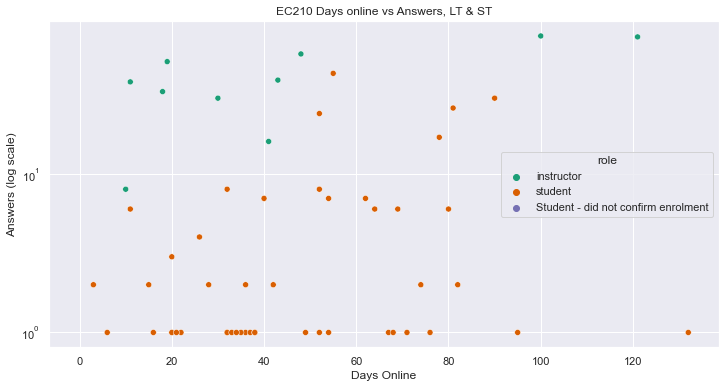

In [24]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC210_LT)

plt.title("EC210 Days online vs Answers, LT & ST")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


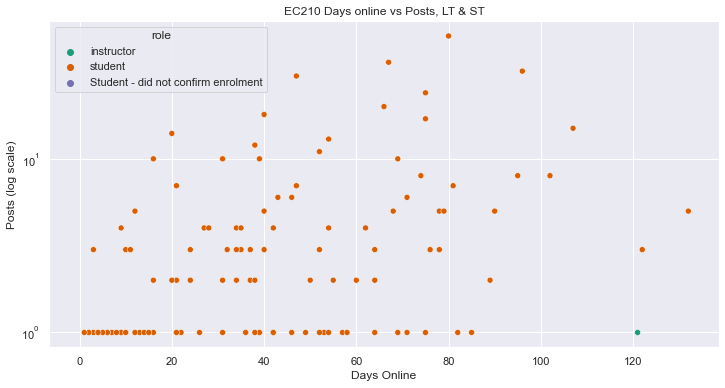

In [25]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="posts", hue='role', data=EC210_LT)

plt.title("EC210 Days online vs Posts, LT & ST")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Posts (log scale)")

plt.show()


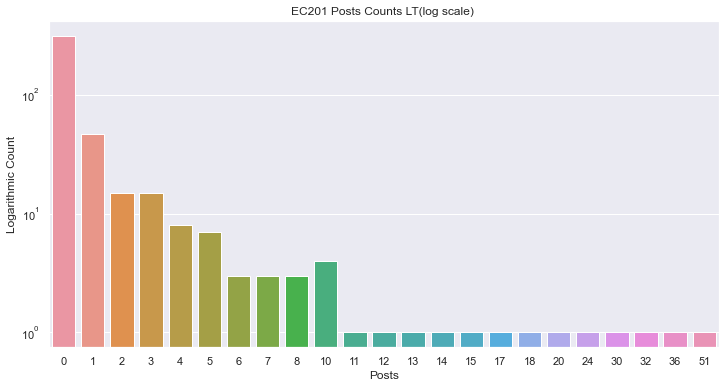

In [26]:
plt.figure(figsize=(12, 6))

sns.countplot(x="posts", data=EC210_LT)

plt.yscale('log')
plt.title("EC201 Posts Counts LT(log scale) ")

plt.xlabel("Posts")
plt.ylabel("Logarithmic Count")

plt.show()


## EC210 MT

In [27]:
#import dataset
EC210_MT = pd.read_excel('EC210 - MT - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC210_MT.columns = EC210_MT.iloc[0]
EC210_MT = EC210_MT.drop(0)
EC210_MT = EC210_MT.drop('groups', axis =1)
EC210_MT = EC210_MT.fillna(0)


EC210_MT.head()


,role,days online,posts,answers,edits to answers,followups,replies to followups
1,instructor,101,0,36,22,0,6
2,instructor,39,0,36,5,0,11
3,instructor,34,0,38,12,0,19
4,instructor,36,0,15,6,0,5
5,instructor,19,0,17,3,0,7


In [28]:
EC210_MT['days online'] = EC210_MT['days online'].astype(int)
EC210_MT['posts'] = EC210_MT['posts'].astype(int)
EC210_MT['answers'] = EC210_MT['answers'].astype(int)
EC210_MT['edits to answers'] = EC210_MT['edits to answers'].astype(int)
EC210_MT['followups'] = EC210_MT['followups'].astype(int)
EC210_MT['replies to followups'] = EC210_MT['replies to followups'].astype(int)

EC210_MT.drop('role', axis=1).describe()

,days online,posts,answers,edits to answers,followups,replies to followups
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,14.525581,0.748837,0.893023,0.311628,0.232558,0.276744
std,16.094362,2.485799,4.608465,1.961305,1.006673,1.451683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,108.000000,23.000000,45.000000,22.000000,11.000000,19.000000


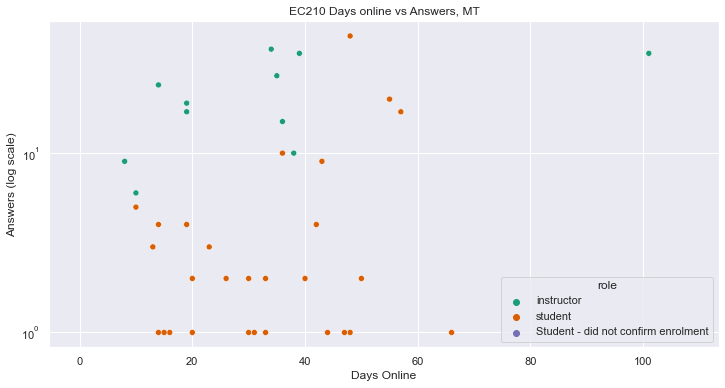

In [29]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC210_MT)

plt.title("EC210 Days online vs Answers, MT")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


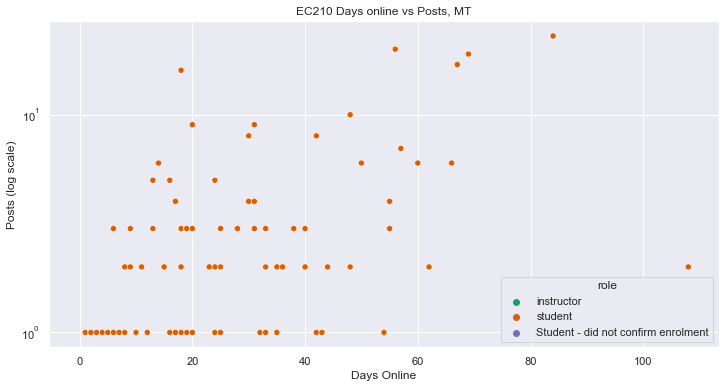

In [30]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="posts", hue='role', data=EC210_MT)

plt.title("EC210 Days online vs Posts, MT")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Posts (log scale)")

plt.show()


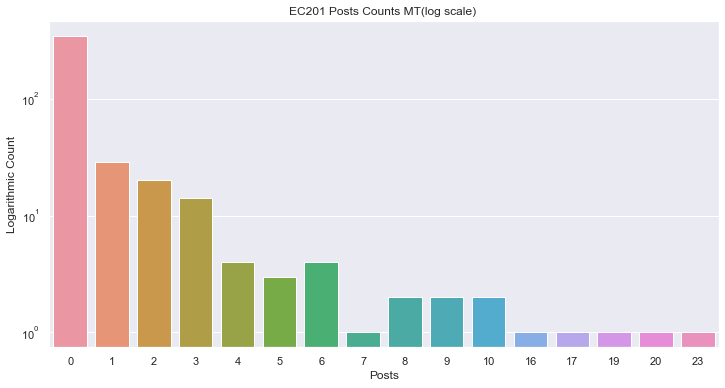

In [31]:
plt.figure(figsize=(12, 6))

sns.countplot(x="posts", data=EC210_MT)

plt.yscale('log')
plt.title("EC201 Posts Counts MT(log scale) ")

plt.xlabel("Posts")
plt.ylabel("Logarithmic Count")

plt.show()


## EC210 Comparing across terms

In [32]:
EC210_LT["Term"] = "LT"
EC210_MT["Term"] = "MT"

EC210_combine = pd.concat([EC210_MT, EC210_LT], ignore_index=True)
EC210_combine.head()

,role,days online,posts,answers,edits to answers,followups,replies to followups,Term
0,instructor,101,0,36,22,0,6,MT
1,instructor,39,0,36,5,0,11,MT
2,instructor,34,0,38,12,0,19,MT
3,instructor,36,0,15,6,0,5,MT
4,instructor,19,0,17,3,0,7,MT


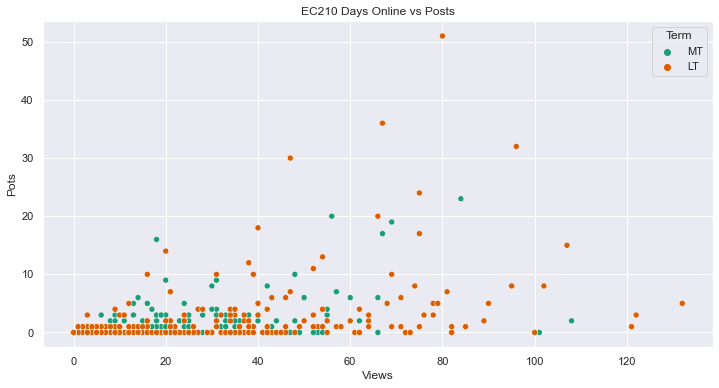

In [33]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="posts", hue='Term', data=EC210_combine)

plt.title("EC210 Days Online vs Posts")

plt.xlabel("Views")
plt.ylabel("Pots")

plt.show()


## EC220 LT AND ST

In [34]:
#import dataset
EC220_LT = pd.read_excel('EC220 - LT and ST - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC220_LT.columns = EC220_LT.iloc[0]
EC220_LT = EC220_LT.drop(0)
EC220_LT = EC220_LT.drop('groups', axis =1)
EC220_LT = EC220_LT.fillna(0)


EC220_LT['days online'] = EC220_LT['days online'].astype(int)
EC220_LT['views'] = EC220_LT['views'].astype(int)
EC220_LT['contributions'] = EC220_LT['contributions'].astype(int)
EC220_LT['questions'] = EC220_LT['questions'].astype(int)
EC220_LT['notes'] = EC220_LT['notes'].astype(int)
EC220_LT['answers'] = EC220_LT['answers'].astype(int)
EC220_LT['endorsed answers'] = EC220_LT['endorsed answers'].astype(int)


EC220_LT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,16,118,48,0,0,38,0
2,Instructor,112,447,332,0,1,235,0
3,Instructor,62,234,13,0,0,10,0
4,Instructor,120,446,29,0,0,25,0
5,Instructor,18,110,13,0,0,11,0


In [35]:
EC220_LT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,19.605459,50.136476,3.992556,1.086849,0.004963,1.945409,0.759305
std,29.428988,100.415474,22.093705,4.565161,0.070359,15.120807,7.299842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,27.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,152.000000,447.000000,332.000000,46.000000,1.000000,235.000000,128.000000


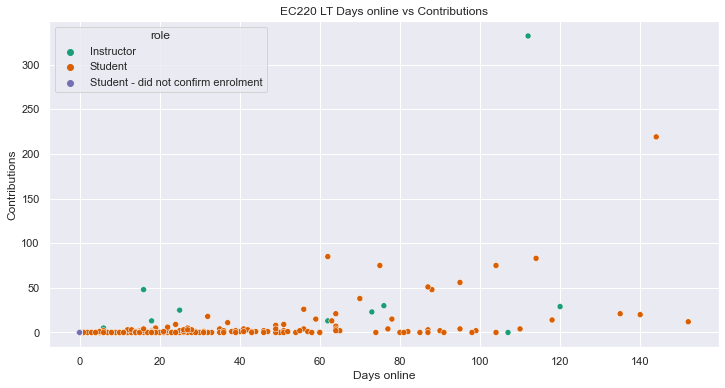

In [36]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC220_LT)

plt.title("EC220 LT Days online vs Contributions")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


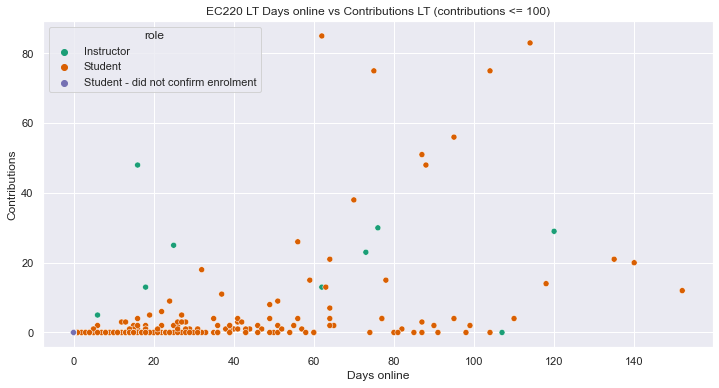

In [37]:
## removing the outliers

plt.figure(figsize=(12, 6))

condition = EC220_LT['contributions'] > 100

df = EC220_LT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC220 LT Days online vs Contributions LT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


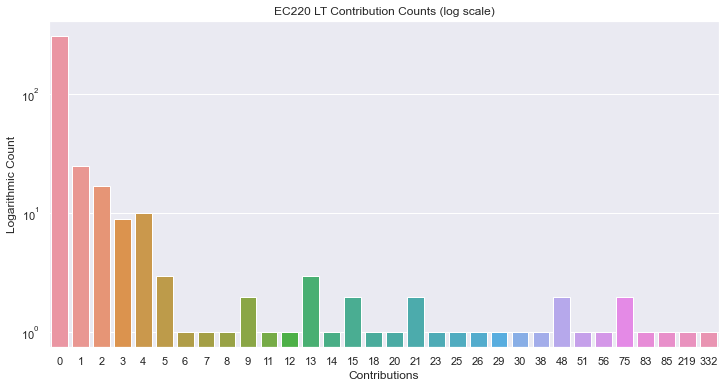

In [38]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC220_LT)

plt.yscale('log')
plt.title("EC220 LT Contribution Counts (log scale)")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


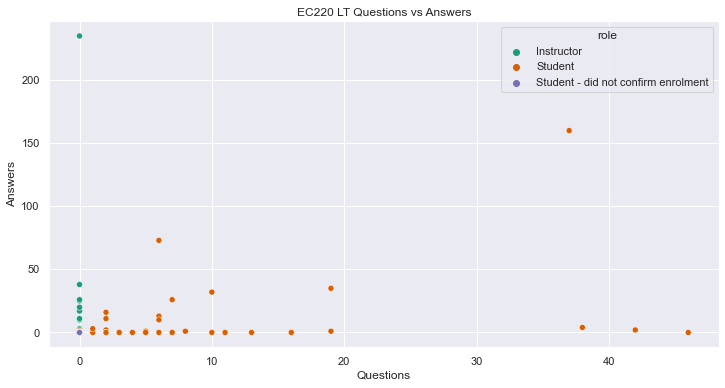

In [39]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC220_LT)

plt.title("EC220 LT Questions vs Answers")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


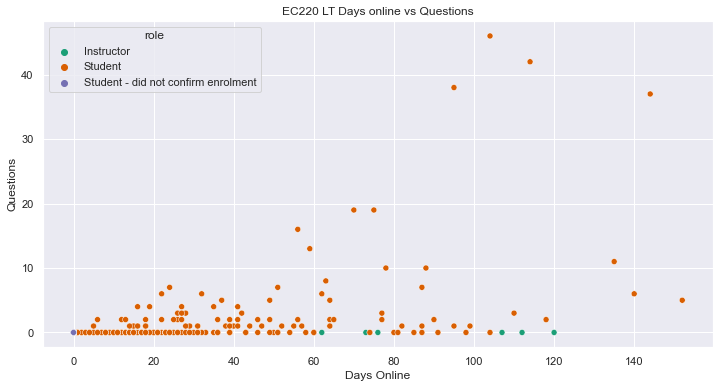

In [40]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC220_LT)

plt.title("EC220 LT Days online vs Questions")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


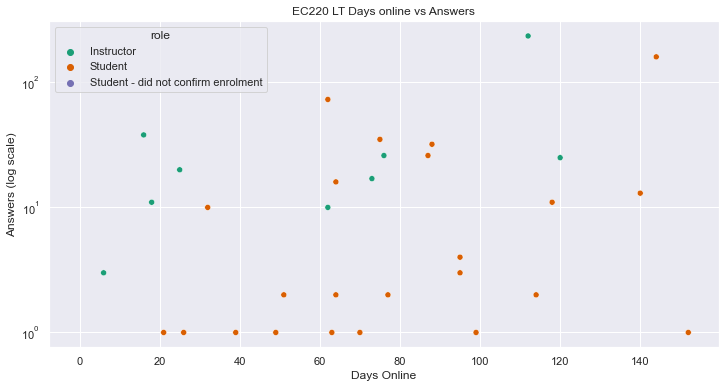

In [41]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC220_LT)

plt.title("EC220 LT Days online vs Answers")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


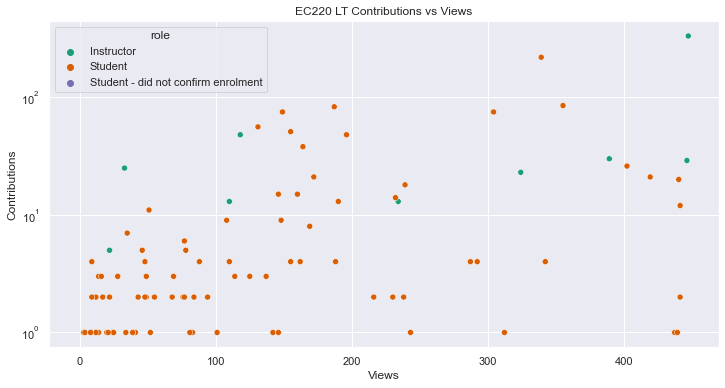

In [42]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='role', data=EC220_LT)

plt.title("EC220 LT Contributions vs Views")

plt.yscale("log")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


## EC220 MT

In [43]:
#import dataset
EC220_MT = pd.read_excel('EC220 - MT - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC220_MT.columns = EC220_MT.iloc[0]
EC220_MT = EC220_MT.drop(0)
EC220_MT = EC220_MT.drop('groups', axis =1)
EC220_MT = EC220_MT.fillna(0)


EC220_MT['days online'] = EC220_MT['days online'].astype(int)
EC220_MT['views'] = EC220_MT['views'].astype(int)
EC220_MT['contributions'] = EC220_MT['contributions'].astype(int)
EC220_MT['questions'] = EC220_MT['questions'].astype(int)
EC220_MT['notes'] = EC220_MT['notes'].astype(int)
EC220_MT['answers'] = EC220_MT['answers'].astype(int)
EC220_MT['endorsed answers'] = EC220_MT['endorsed answers'].astype(int)



EC220_MT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,6,27,0,0,0,0,0
2,Instructor,8,39,3,0,0,2,0
3,Instructor,196,521,609,2,13,418,0
4,Instructor,84,198,2,0,0,2,0
5,Instructor,140,376,1,0,0,1,0


In [44]:
EC220_MT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,24.139752,50.187888,3.197205,0.765528,0.026398,1.563665,0.493789
std,36.752576,93.813075,27.902740,3.389581,0.521022,19.289252,5.971807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,48.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,242.000000,521.000000,609.000000,46.000000,13.000000,418.000000,139.000000


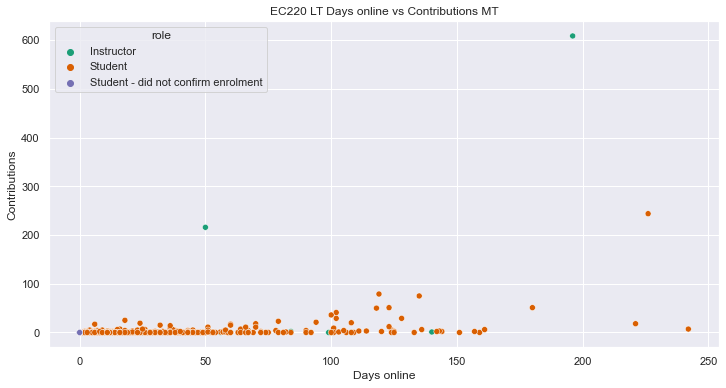

In [45]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC220_MT)

plt.title("EC220 LT Days online vs Contributions MT")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


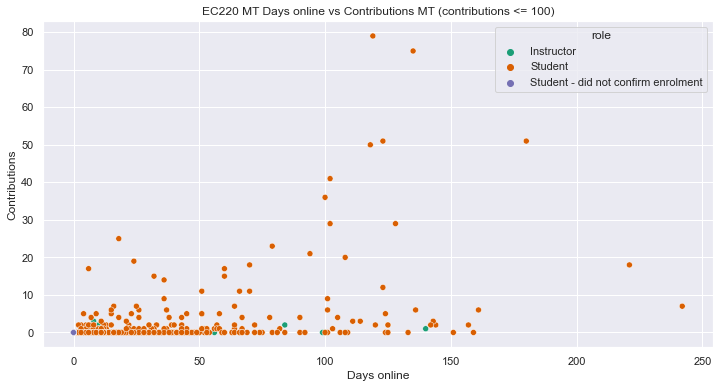

In [46]:
plt.figure(figsize=(12, 6))

condition = EC220_MT['contributions'] > 100

df = EC220_MT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC220 MT Days online vs Contributions MT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


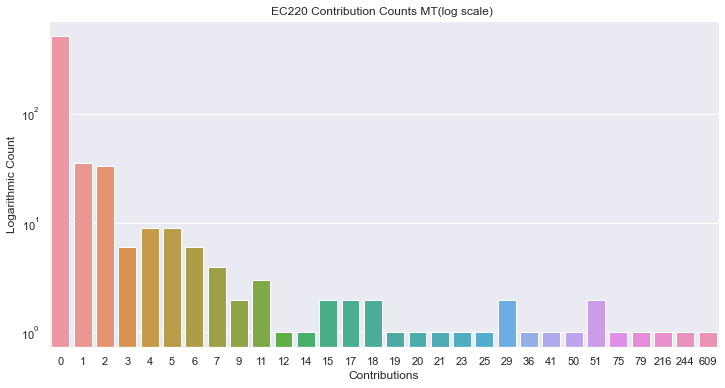

In [47]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC220_MT)

plt.yscale('log')
plt.title("EC220 Contribution Counts MT(log scale) ")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


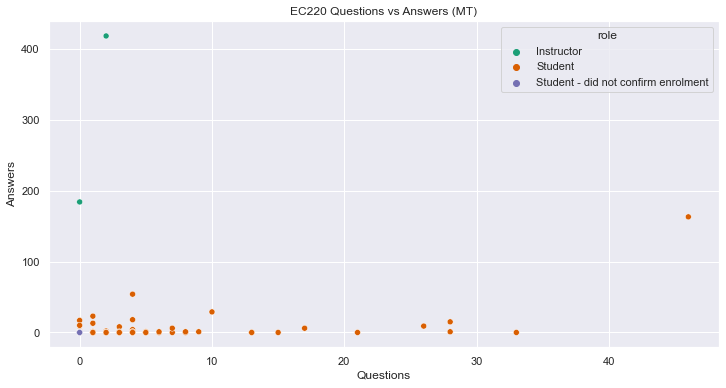

In [48]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC220_MT)

plt.title("EC220 Questions vs Answers (MT)")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


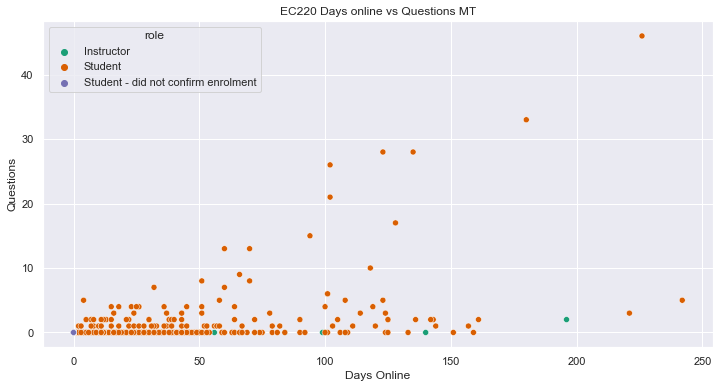

In [49]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC220_MT)

plt.title("EC220 Days online vs Questions MT")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


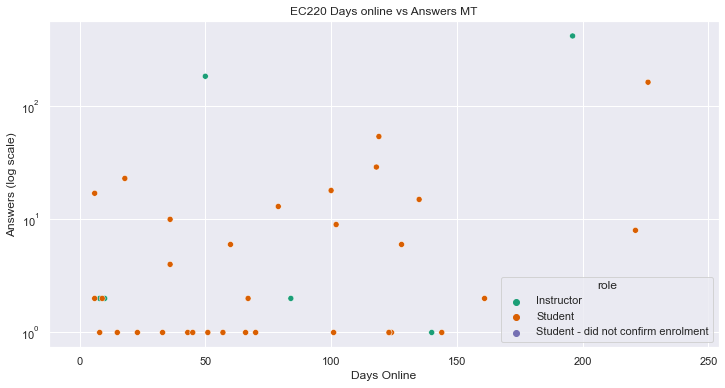

In [50]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC220_MT)

plt.title("EC220 Days online vs Answers MT")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


## EC220 Comparing across terms

In [51]:
EC220_LT["Term"] = "LT"
EC220_MT["Term"] = "MT"

EC220_combine = pd.concat([EC220_MT, EC220_LT], ignore_index=True)
EC220_combine.head()

,role,days online,views,contributions,questions,notes,answers,endorsed answers,Term
0,Instructor,6,27,0,0,0,0,0,MT
1,Instructor,8,39,3,0,0,2,0,MT
2,Instructor,196,521,609,2,13,418,0,MT
3,Instructor,84,198,2,0,0,2,0,MT
4,Instructor,140,376,1,0,0,1,0,MT


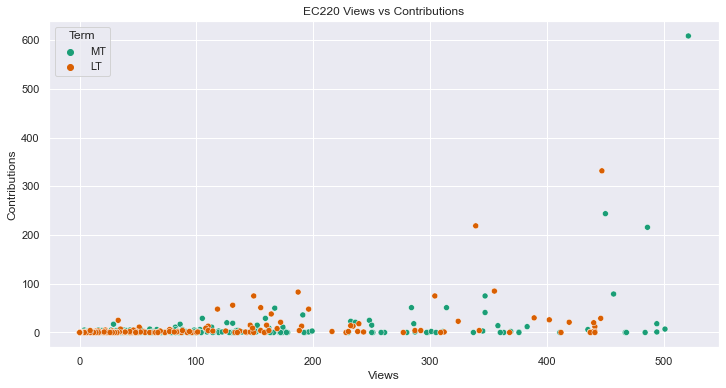

In [52]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='Term', data=EC220_combine)

plt.title("EC220 Views vs Contributions")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


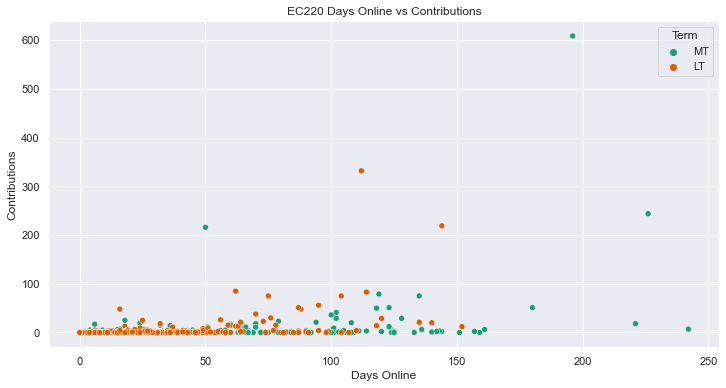

In [53]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='Term', data=EC220_combine)

plt.title("EC220 Days Online vs Contributions")

plt.xlabel("Days Online")
plt.ylabel("Contributions")

plt.show()


## EC100 LT AND ST

In [54]:
#import dataset
EC100_LT = pd.read_excel('EC100 - LT and ST - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC100_LT.columns = EC100_LT.iloc[0]
EC100_LT = EC100_LT.drop(0)
EC100_LT = EC100_LT.drop('groups', axis =1)
EC100_LT = EC100_LT.fillna(0)


EC100_LT['days online'] = EC100_LT['days online'].astype(int)
EC100_LT['views'] = EC100_LT['views'].astype(int)
EC100_LT['contributions'] = EC100_LT['contributions'].astype(int)
EC100_LT['questions'] = EC100_LT['questions'].astype(int)
EC100_LT['notes'] = EC100_LT['notes'].astype(int)
EC100_LT['answers'] = EC100_LT['answers'].astype(int)
EC100_LT['endorsed answers'] = EC100_LT['endorsed answers'].astype(int)


EC100_LT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,1,2,0,0,0,0,0
2,Instructor,6,25,1,0,0,1,0
3,Instructor,24,9,0,0,0,0,0
4,Instructor,7,24,2,0,0,1,0
5,Instructor,2,8,1,0,0,1,0


In [55]:
EC100_LT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,1.310345,3.313975,0.141561,0.054446,0.001815,0.074410,0.001815
std,4.844478,7.807768,0.840950,0.342097,0.042601,0.660508,0.042601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,37.000000,14.000000,4.000000,1.000000,13.000000,1.000000


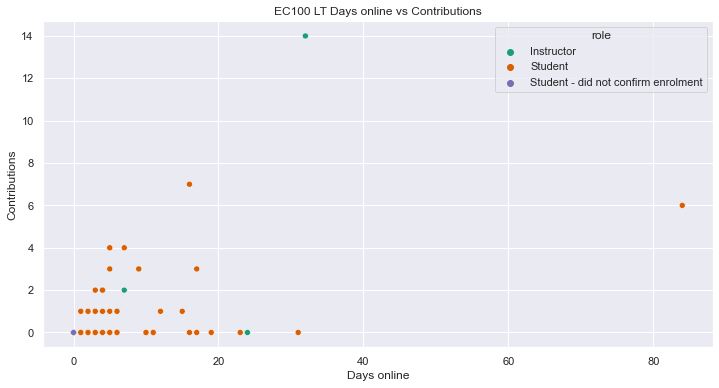

In [56]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC100_LT)

plt.title("EC100 LT Days online vs Contributions")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


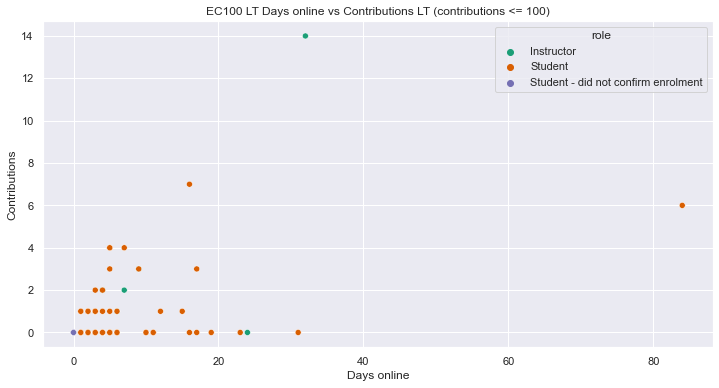

In [57]:
## removing the outliers

plt.figure(figsize=(12, 6))

condition = EC100_LT['contributions'] > 100

df = EC100_LT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC100 LT Days online vs Contributions LT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


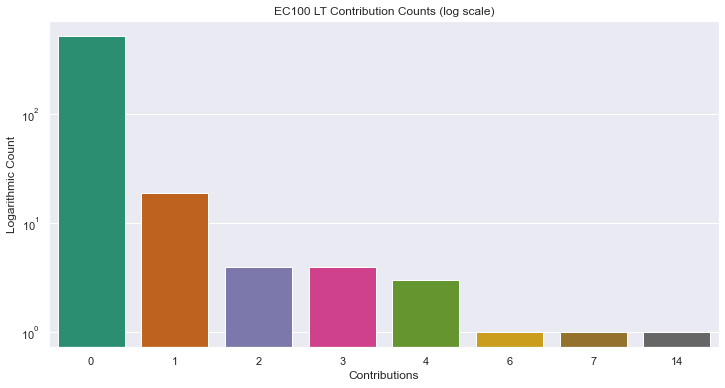

In [58]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC100_LT)

plt.yscale('log')
plt.title("EC100 LT Contribution Counts (log scale)")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


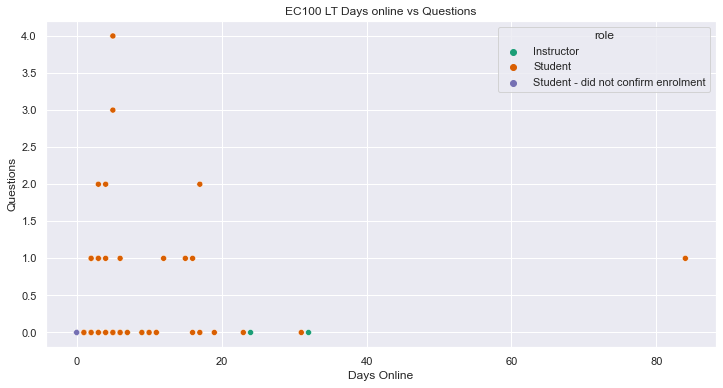

In [59]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC100_LT)

plt.title("EC100 LT Days online vs Questions")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


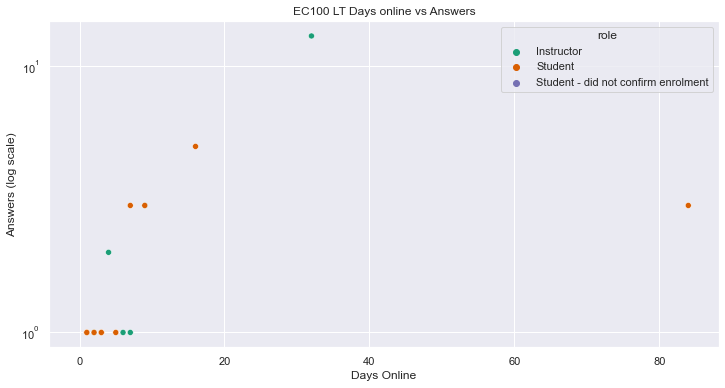

In [60]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC100_LT)

plt.title("EC100 LT Days online vs Answers")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


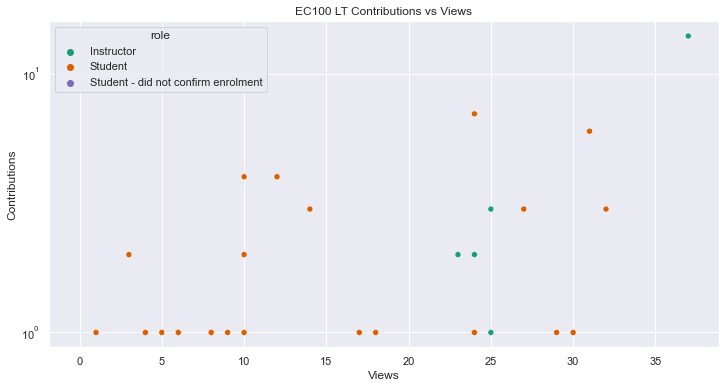

In [61]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='role', data=EC100_LT)

plt.title("EC100 LT Contributions vs Views")

plt.yscale("log")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


## EC100 MT

In [62]:
#import dataset
EC100_MT = pd.read_excel('EC100 - MT - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC100_MT.columns = EC100_MT.iloc[0]
EC100_MT = EC100_MT.drop(0)
EC100_MT = EC100_MT.drop('groups', axis =1)
EC100_MT = EC100_MT.fillna(0)


EC100_MT['days online'] = EC100_MT['days online'].astype(int)
EC100_MT['views'] = EC100_MT['views'].astype(int)
EC100_MT['contributions'] = EC100_MT['contributions'].astype(int)
EC100_MT['questions'] = EC100_MT['questions'].astype(int)
EC100_MT['notes'] = EC100_MT['notes'].astype(int)
EC100_MT['answers'] = EC100_MT['answers'].astype(int)
EC100_MT['endorsed answers'] = EC100_MT['endorsed answers'].astype(int)

EC100_MT.head()



,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,70,107,22,0,5,13,0
2,Instructor,47,49,4,0,1,2,0
3,Instructor,24,109,19,0,0,15,0
4,Instructor,20,70,23,0,1,16,0
5,Instructor,19,62,8,0,0,8,0


In [63]:
EC100_MT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,2.487485,9.487485,0.328963,0.103695,0.011919,0.147795,0.020262
std,5.614253,19.041019,1.993787,0.629409,0.188831,1.201468,0.273437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,109.000000,32.000000,12.000000,5.000000,16.000000,5.000000


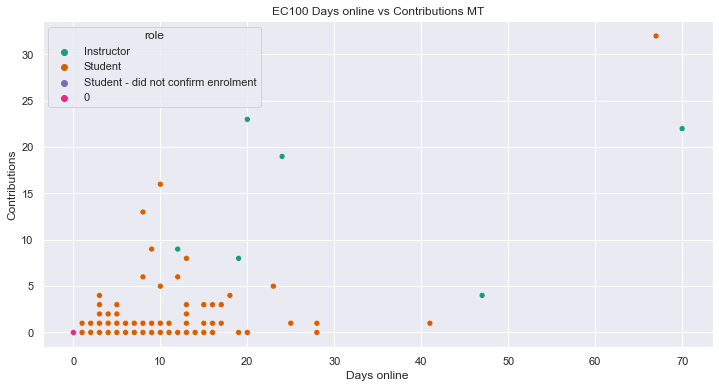

In [64]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC100_MT)

plt.title("EC100 Days online vs Contributions MT")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


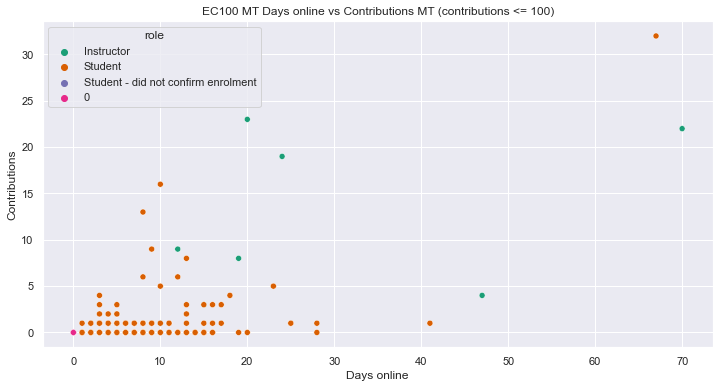

In [65]:
plt.figure(figsize=(12, 6))

condition = EC100_MT['contributions'] > 100

df = EC100_MT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC100 MT Days online vs Contributions MT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


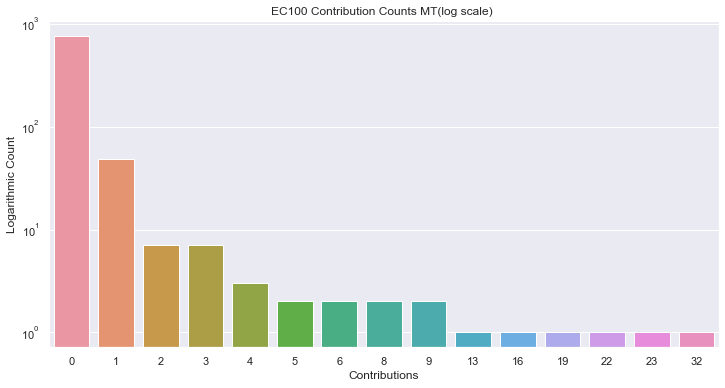

In [66]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC100_MT)

plt.yscale('log')
plt.title("EC100 Contribution Counts MT(log scale) ")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


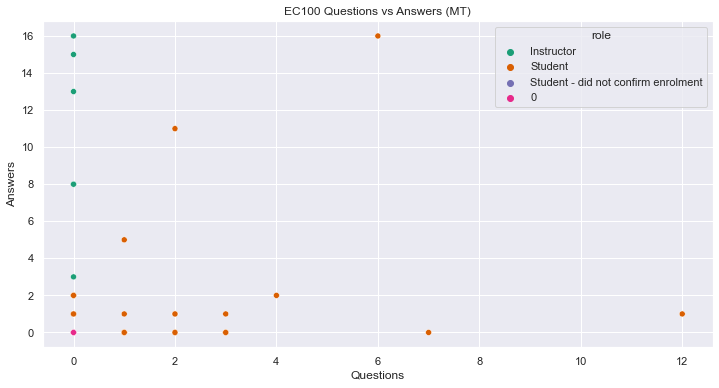

In [67]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC100_MT)

plt.title("EC100 Questions vs Answers (MT)")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


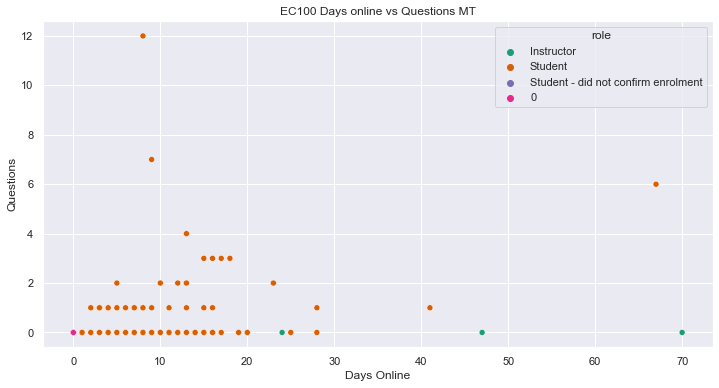

In [68]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC100_MT)

plt.title("EC100 Days online vs Questions MT")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


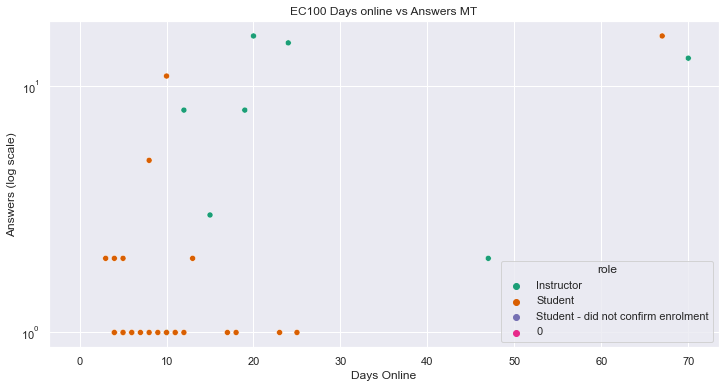

In [69]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC100_MT)

plt.title("EC100 Days online vs Answers MT")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


## EC100 Comparing across terms

In [70]:
EC100_LT["Term"] = "LT"
EC100_MT["Term"] = "MT"

EC100_combine = pd.concat([EC100_MT, EC100_LT], ignore_index=True)
EC100_combine.head()

,role,days online,views,contributions,questions,notes,answers,endorsed answers,Term
0,Instructor,70,107,22,0,5,13,0,MT
1,Instructor,47,49,4,0,1,2,0,MT
2,Instructor,24,109,19,0,0,15,0,MT
3,Instructor,20,70,23,0,1,16,0,MT
4,Instructor,19,62,8,0,0,8,0,MT


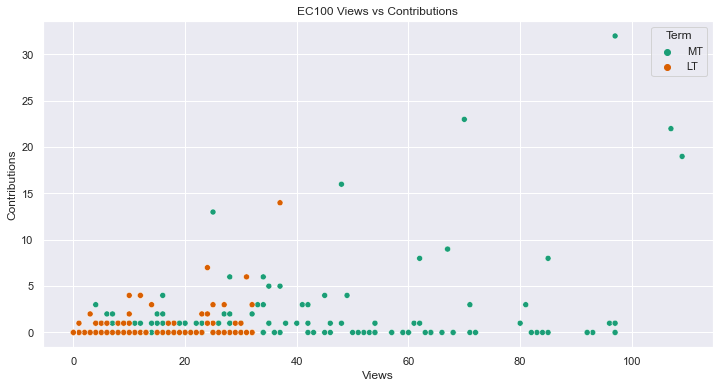

In [71]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='Term', data=EC100_combine)

plt.title("EC100 Views vs Contributions")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


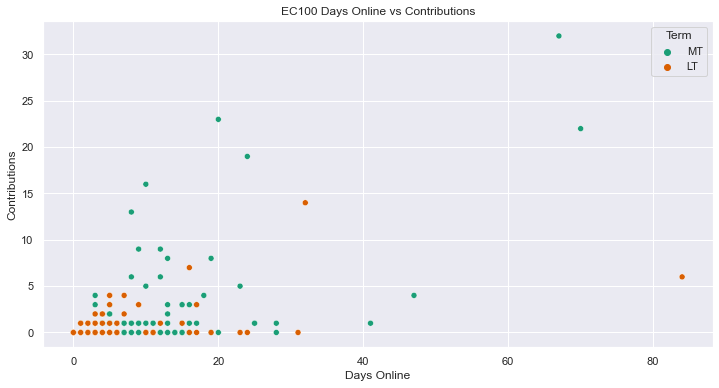

In [72]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='Term', data=EC100_combine)

plt.title("EC100 Days Online vs Contributions")

plt.xlabel("Days Online")
plt.ylabel("Contributions")

plt.show()


## EC102 LT AND ST

In [73]:
#import dataset
EC102_LT = pd.read_excel('EC102 - LT and ST - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC102_LT.columns = EC102_LT.iloc[0]
EC102_LT = EC102_LT.drop(0)
EC102_LT = EC102_LT.drop('groups', axis =1)
EC102_LT = EC102_LT.fillna(0)


EC102_LT['days online'] = EC102_LT['days online'].astype(int)
EC102_LT['views'] = EC102_LT['views'].astype(int)
EC102_LT['contributions'] = EC102_LT['contributions'].astype(int)
EC102_LT['questions'] = EC102_LT['questions'].astype(int)
EC102_LT['notes'] = EC102_LT['notes'].astype(int)
EC102_LT['answers'] = EC102_LT['answers'].astype(int)
EC102_LT['endorsed answers'] = EC102_LT['endorsed answers'].astype(int)


EC102_LT.head()


,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,3,22,0,0,0,0,0
2,Instructor,121,478,89,0,4,76,0
3,Instructor,12,440,1,0,0,1,0
4,Instructor,10,80,0,0,0,0,0
5,Instructor,12,74,17,0,0,16,0


In [74]:
EC102_LT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,8.402204,50.376492,1.395776,0.395776,0.034894,0.724518,0.249770
std,14.833879,95.848550,9.435073,2.030652,0.304190,7.540537,3.756619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,125.000000,478.000000,194.000000,41.000000,5.000000,162.000000,114.000000


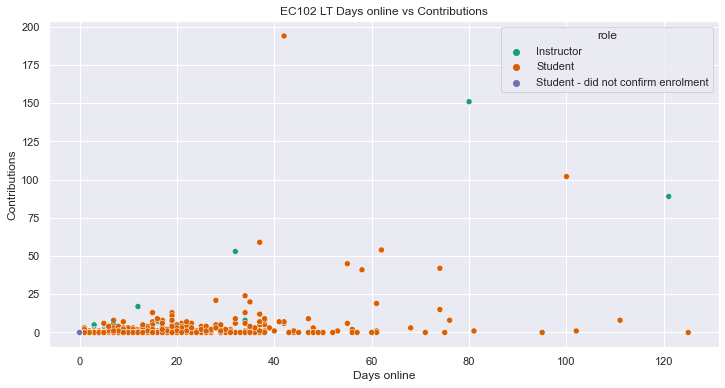

In [75]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC102_LT)

plt.title("EC102 LT Days online vs Contributions")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


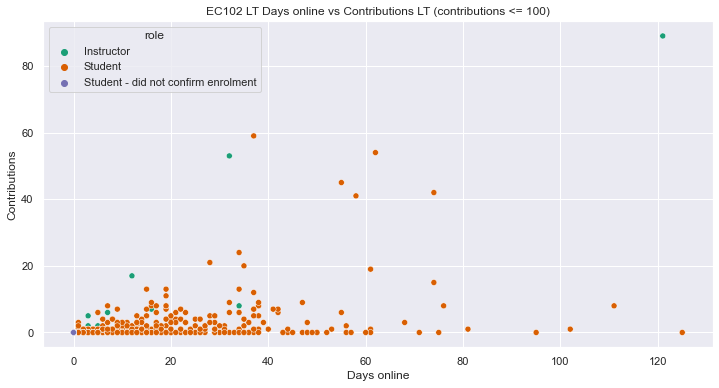

In [76]:
## removing the outliers

plt.figure(figsize=(12, 6))

condition = EC102_LT['contributions'] > 100

df = EC102_LT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC102 LT Days online vs Contributions LT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


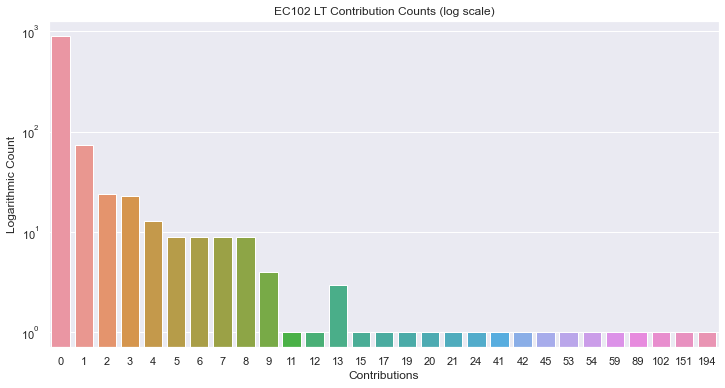

In [77]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC102_LT)

plt.yscale('log')
plt.title("EC102 LT Contribution Counts (log scale)")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


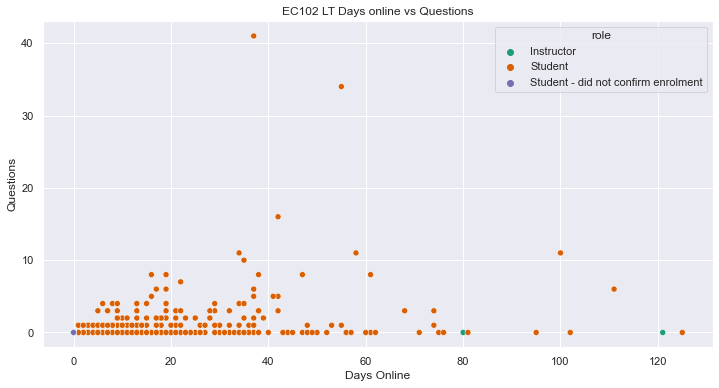

In [78]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC102_LT)

plt.title("EC102 LT Days online vs Questions")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


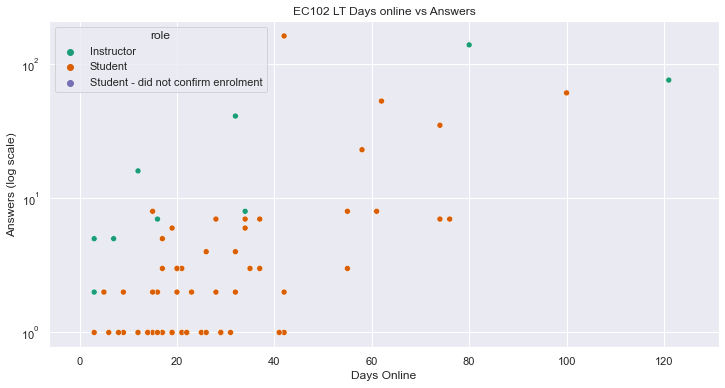

In [79]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC102_LT)

plt.title("EC102 LT Days online vs Answers")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


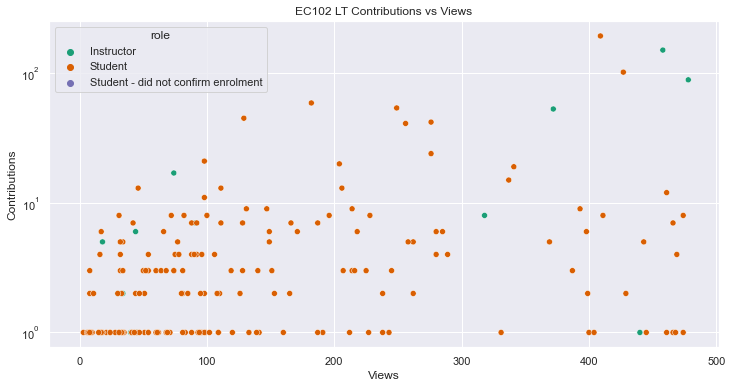

In [80]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='role', data=EC102_LT)

plt.title("EC102 LT Contributions vs Views")

plt.yscale("log")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


##  EC102 MT

In [81]:
#import dataset
EC102_MT = pd.read_excel('EC102 - MT - anonymised.xlsx', sheet_name = 'Sheet 1', header = 0)

EC102_MT.columns = EC102_MT.iloc[0]
EC102_MT = EC102_MT.drop(0)
EC102_MT = EC102_MT.drop('groups', axis =1)
EC102_MT = EC102_MT.fillna(0)


EC102_MT['days online'] = EC102_MT['days online'].astype(int)
EC102_MT['views'] = EC102_MT['views'].astype(int)
EC102_MT['contributions'] = EC102_MT['contributions'].astype(int)
EC102_MT['questions'] = EC102_MT['questions'].astype(int)
EC102_MT['notes'] = EC102_MT['notes'].astype(int)
EC102_MT['answers'] = EC102_MT['answers'].astype(int)
EC102_MT['endorsed answers'] = EC102_MT['endorsed answers'].astype(int)

EC102_MT.head()



,role,days online,views,contributions,questions,notes,answers,endorsed answers
1,Instructor,13,60,2,0,0,2,0
2,Instructor,229,406,136,1,25,83,0
3,Instructor,33,392,2,0,0,2,0
4,Instructor,24,155,3,0,0,1,0
5,Instructor,40,197,37,0,0,36,0


In [82]:
EC100_MT.drop('role', axis=1).describe()

,days online,views,contributions,questions,notes,answers,endorsed answers
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,2.487485,9.487485,0.328963,0.103695,0.011919,0.147795,0.020262
std,5.614253,19.041019,1.993787,0.629409,0.188831,1.201468,0.273437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,109.000000,32.000000,12.000000,5.000000,16.000000,5.000000


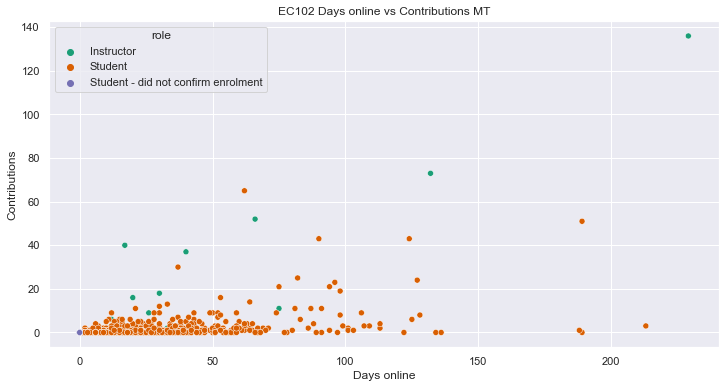

In [83]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='role', data=EC102_MT)

plt.title("EC102 Days online vs Contributions MT")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


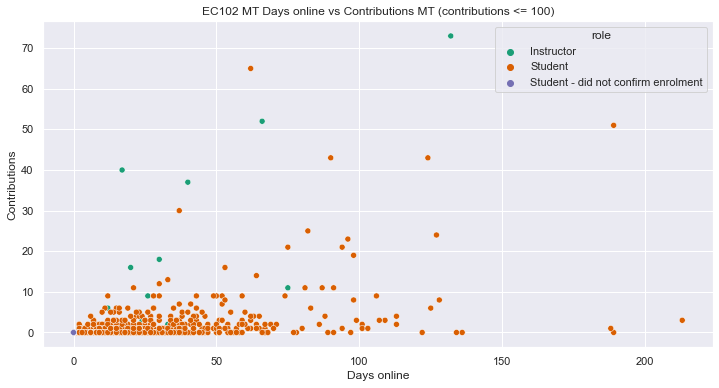

In [84]:
plt.figure(figsize=(12, 6))

condition = EC102_MT['contributions'] > 100

df = EC102_MT[~condition]

sns.scatterplot(x="days online", y="contributions", hue='role', data=df)

plt.title("EC102 MT Days online vs Contributions MT (contributions <= 100)")

plt.xlabel("Days online")
plt.ylabel("Contributions")

plt.show()


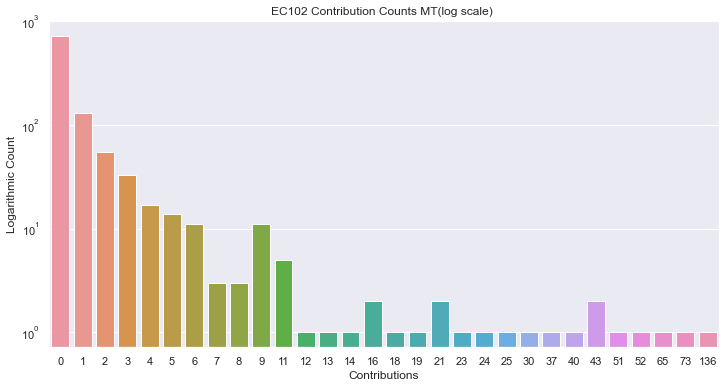

In [85]:
plt.figure(figsize=(12, 6))

sns.countplot(x="contributions", data=EC102_MT)

plt.yscale('log')
plt.title("EC102 Contribution Counts MT(log scale) ")

plt.xlabel("Contributions")
plt.ylabel("Logarithmic Count")

plt.show()


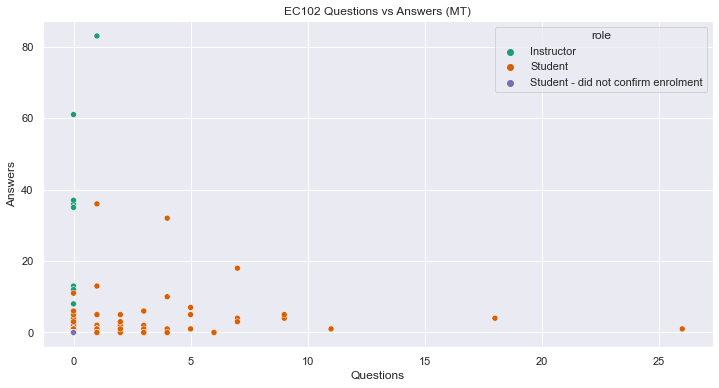

In [86]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="questions", y="answers", hue='role', data=EC102_MT)

plt.title("EC102 Questions vs Answers (MT)")

plt.xlabel("Questions")
plt.ylabel("Answers")

plt.show()


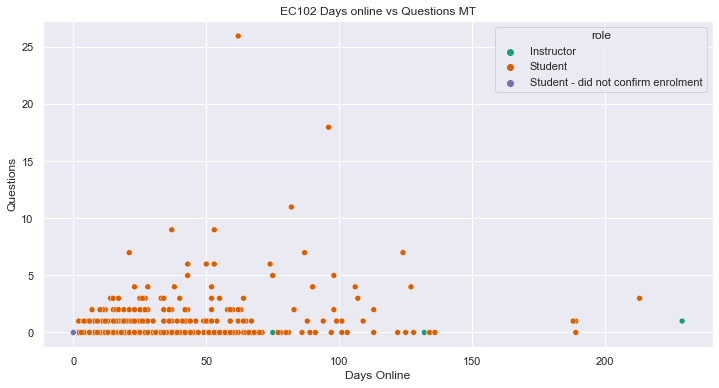

In [87]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="questions", hue='role',data=EC102_MT)

plt.title("EC102 Days online vs Questions MT")


plt.xlabel("Days Online")
plt.ylabel("Questions")

plt.show()


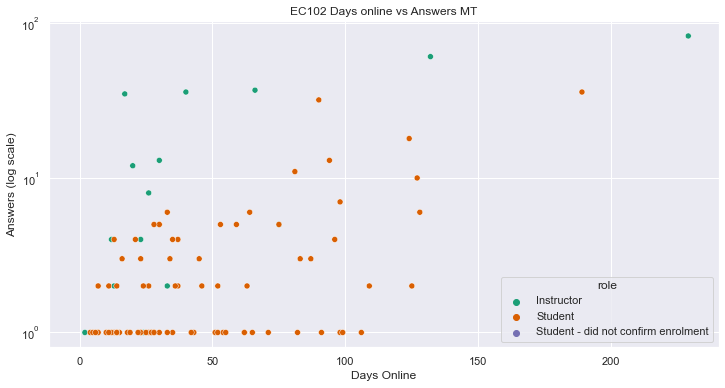

In [88]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="answers", hue='role', data=EC102_MT)

plt.title("EC102 Days online vs Answers MT")

plt.yscale("log")


plt.xlabel("Days Online")
plt.ylabel("Answers (log scale)")

plt.show()


## EC102 Comparing across terms

In [89]:
EC102_LT["Term"] = "LT"
EC102_MT["Term"] = "MT"

EC102_combine = pd.concat([EC102_MT, EC102_LT], ignore_index=True)
EC102_combine.head()

,role,days online,views,contributions,questions,notes,answers,endorsed answers,Term
0,Instructor,13,60,2,0,0,2,0,MT
1,Instructor,229,406,136,1,25,83,0,MT
2,Instructor,33,392,2,0,0,2,0,MT
3,Instructor,24,155,3,0,0,1,0,MT
4,Instructor,40,197,37,0,0,36,0,MT


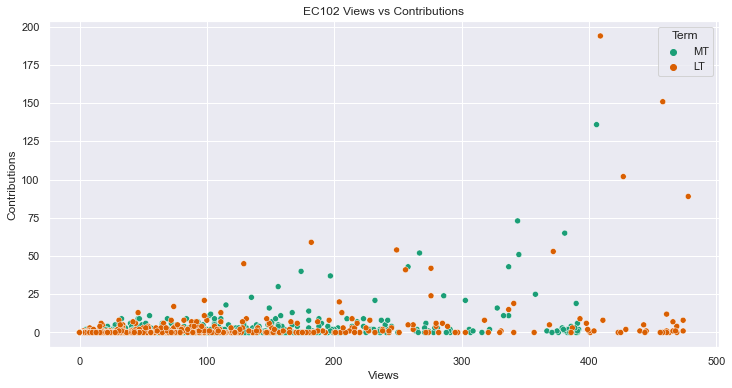

In [90]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="views", y="contributions", hue='Term', data=EC102_combine)

plt.title("EC102 Views vs Contributions")

plt.xlabel("Views")
plt.ylabel("Contributions")

plt.show()


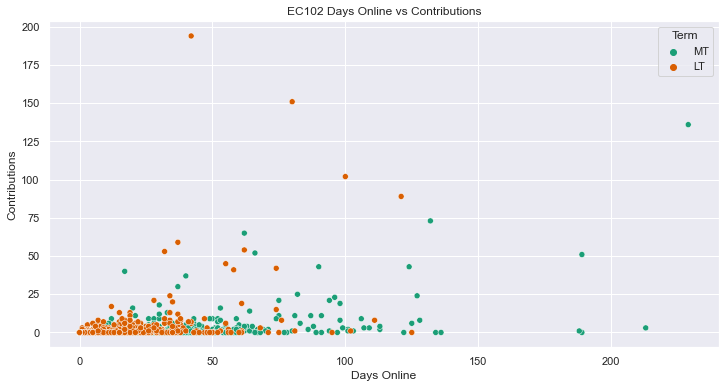

In [91]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x="days online", y="contributions", hue='Term', data=EC102_combine)

plt.title("EC102 Days Online vs Contributions")

plt.xlabel("Days Online")
plt.ylabel("Contributions")

plt.show()
